# heart disease predection

In [14]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor as DEC_T_reg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DEC_T_class
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split as tts 
from matplotlib import rcParams 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\ML_heart_diseases\dataset.csv")

In [15]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# correlation chart

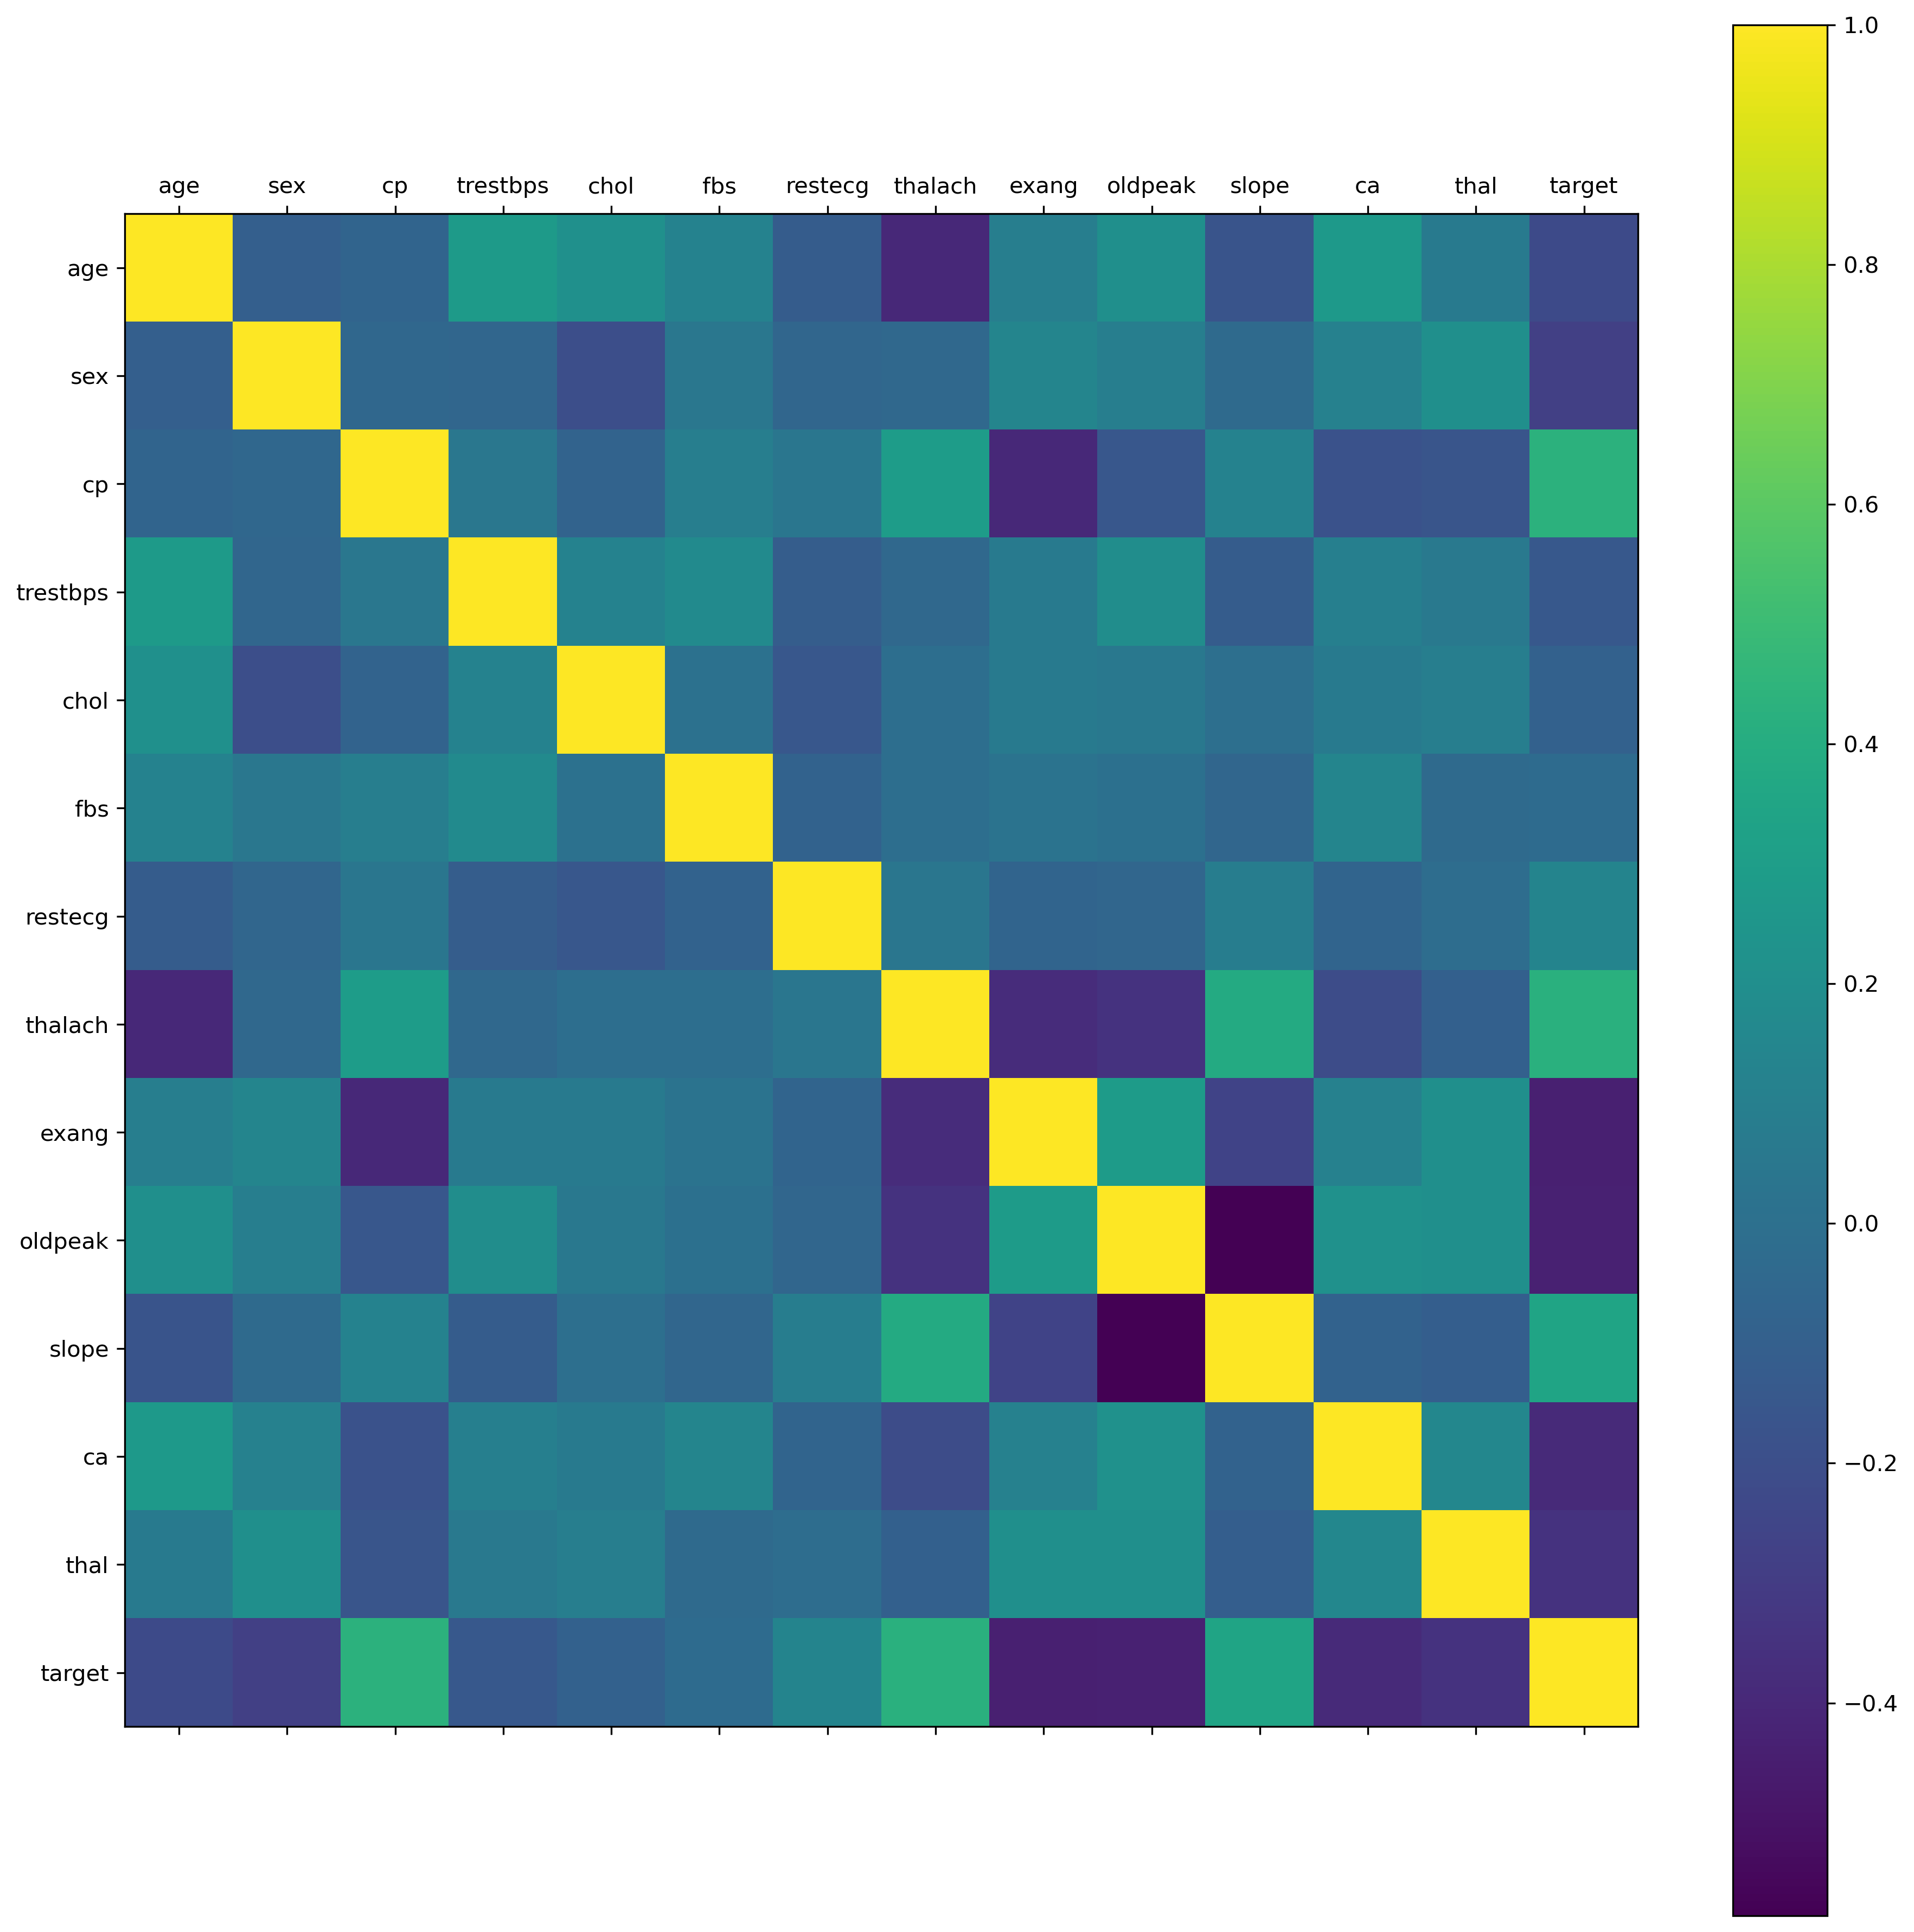

In [16]:
rcParams["figure.dpi"]=300
rcParams["figure.figsize"]=5,15
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]),data.columns)
plt.xticks(np.arange(data.shape[1]),data.columns)
plt.colorbar()



In [17]:
y=data.target
x=data.drop(["target"],axis=1)
t_x,val_x,t_y,val_y=tts(x,y,random_state=0,test_size=0.3)

# cross validation to get best fit :  
    1- hyperparameter :criterion , entropy;max_depth=[list for depth] 
    2- new variable =gridsearchCV(no3 altree : Decission tree regrosser or classifier , hyperprameter ,scoring: roc_auc)
    3- new var2=newvvar.fit(t_x,y_y)
    4- newvar2.best_estimator.feature_importance_

In [18]:
hyper_par = {"criterion":['entropy','gini'],"max_depth":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
tree_gridsearch=GridSearchCV(DEC_T_class(),hyper_par,scoring="roc_auc",n_jobs=-1)
tree=tree_gridsearch.fit(t_x,t_y)
last_model=tree.best_estimator_
print(f"the best fit is : {tree.best_params_}")

the best fit is : {'criterion': 'entropy', 'max_depth': 3}


F:\New folder\New folder\anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.68211289 0.80895309 0.83983282 0.83130456 0.81035522
 0.74969012 0.75999396 0.75955378 0.74040173 0.73448385 0.74767671
 0.76851004 0.75410946 0.7360539  0.75005403 0.75410946 0.7564836
 0.74394546 0.76774409 0.75399822        nan 0.68211289 0.81674241
 0.82733018 0.8240015  0.75737774 0.76076151 0.74028678 0.73651157
 0.72405818 0.74033181 0.72768879 0.73060959 0.71463895 0.73412154
 0.72874714 0.76178808 0.7390923  0.72114798 0.7265923  0.74018879]
  warnings.warn(


In [19]:
for i in list(range(len(last_model.feature_importances_))):
    print(t_x.columns[i]," : ",last_model.feature_importances_[i]*100 ,'%')
n=list(t_x.columns)
y=list(last_model.feature_importances_)


age  :  6.523439543614698 %
sex  :  11.868648271180167 %
cp  :  36.483264047479445 %
trestbps  :  0.0 %
chol  :  0.0 %
fbs  :  0.0 %
restecg  :  0.0 %
thalach  :  9.354510973644453 %
exang  :  0.0 %
oldpeak  :  0.0 %
slope  :  0.0 %
ca  :  25.197016514527064 %
thal  :  10.57312064955417 %


# pie chart

<ipython-input-30-38d351040069>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(x=y, autopct="%.1f%%", explode=[0.05]*len(y), labels=labels, pctdistance=0.5)


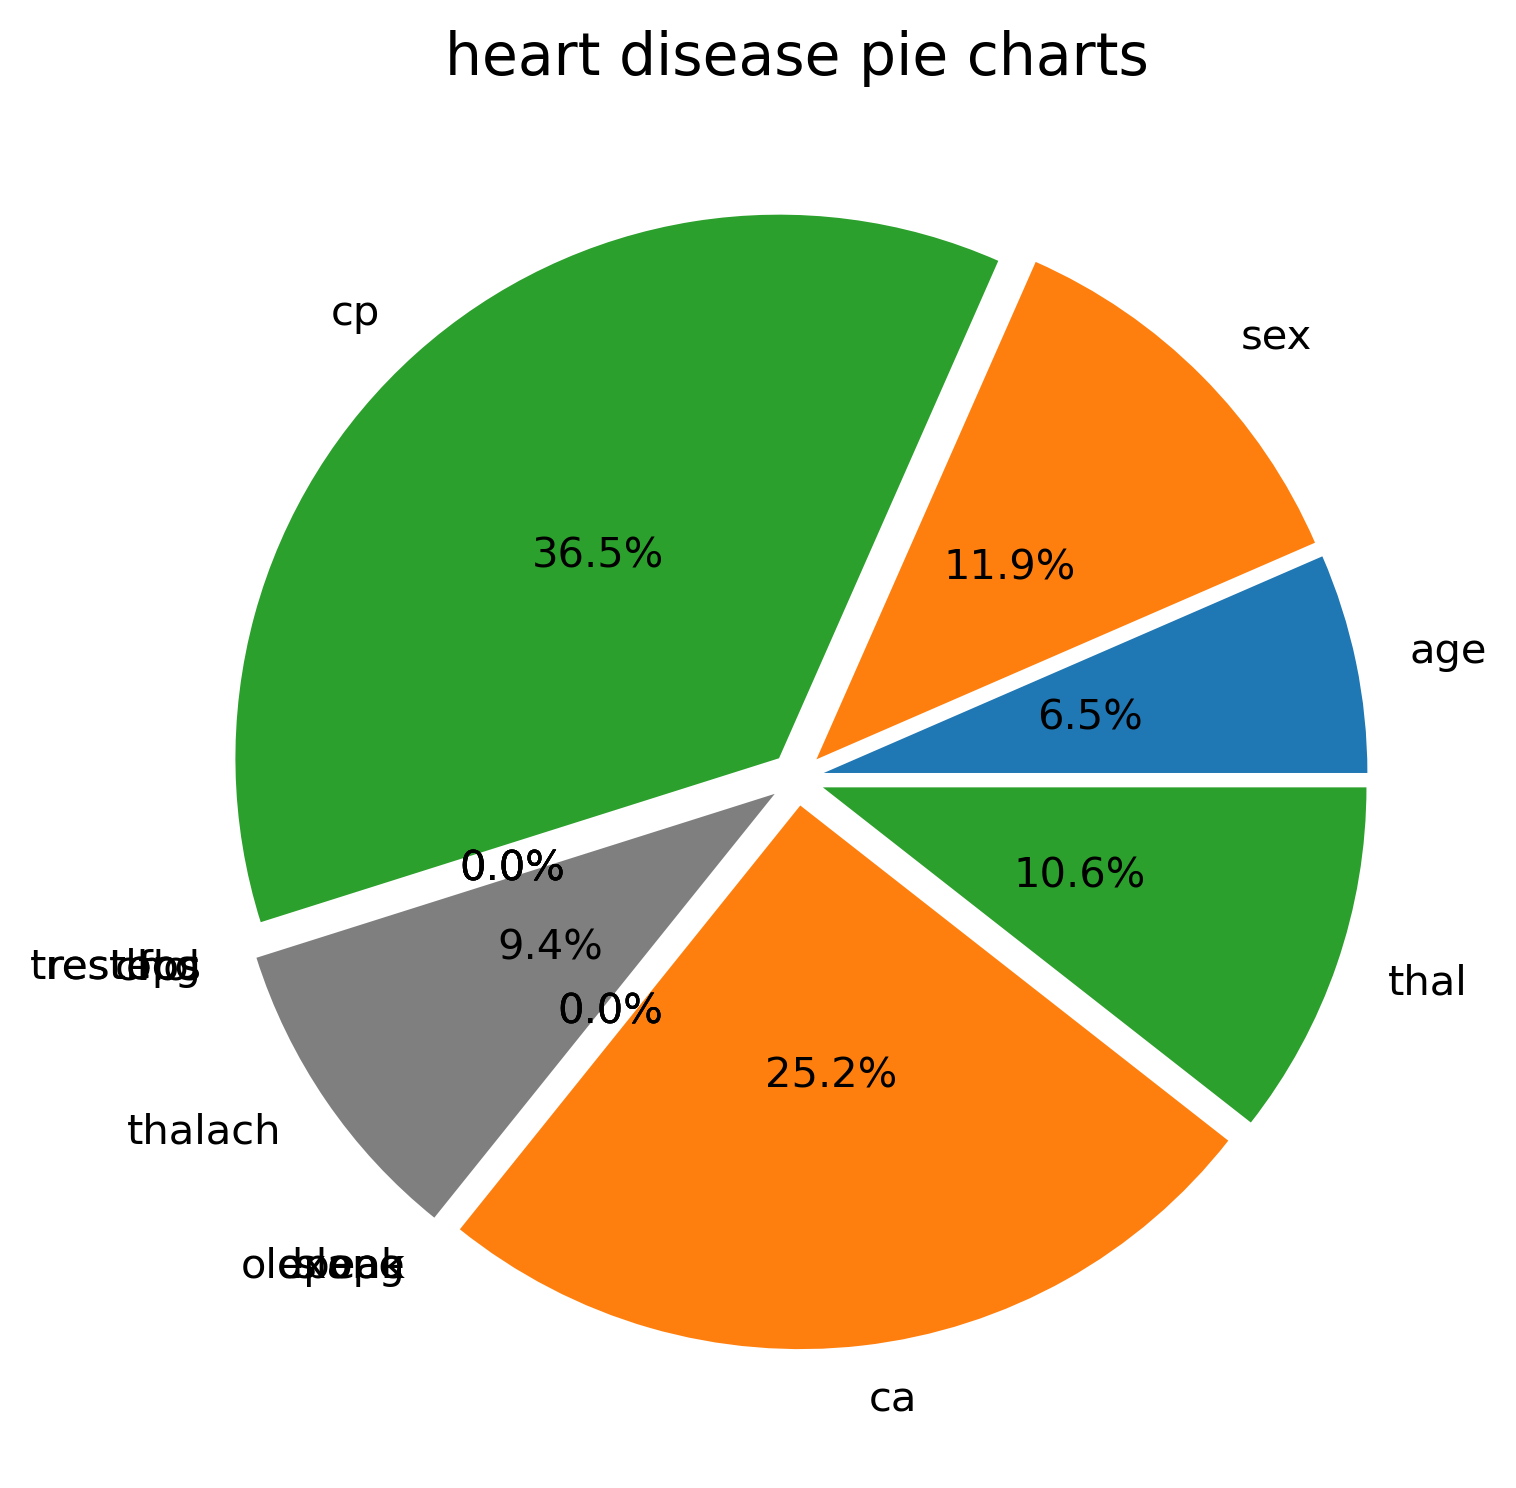

In [30]:
pie, ax = plt.subplots(figsize=[6,6])
labels = t_x.keys()
plt.pie(x=y, autopct="%.1f%%", explode=[0.05]*len(y), labels=labels, pctdistance=0.5)
plt.title("heart disease pie charts", fontsize=14);
pie.savefig("heart disease reason.png")

# draw the classifier tree 

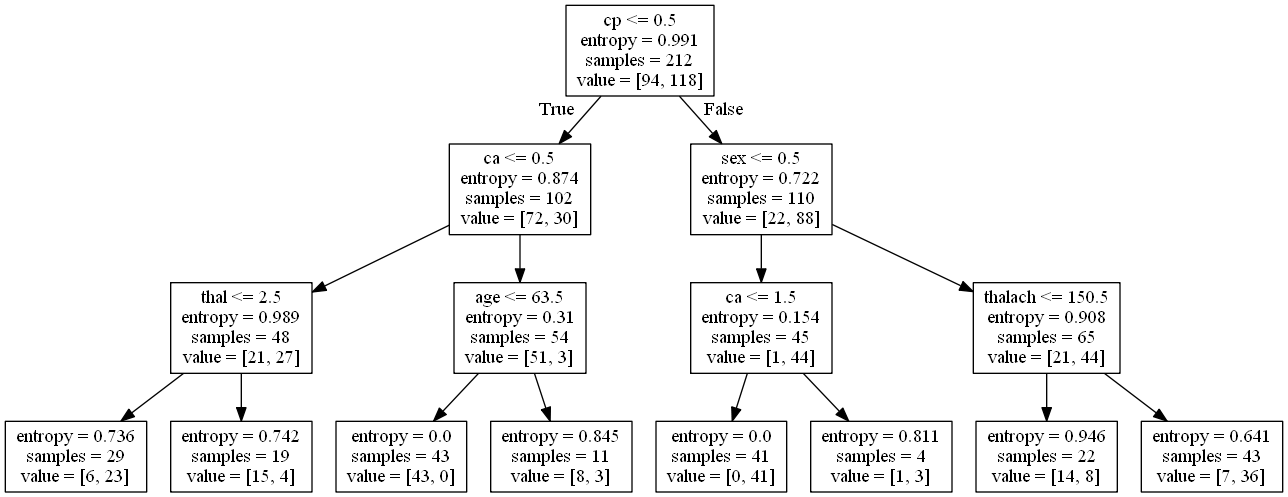

In [21]:
from IPython.display import Image as i
import pydotplus as pd
from sklearn import tree
data=tree.export_graphviz(last_model,feature_names=t_x.columns)
graph=pd.graph_from_dot_data(data)
i(graph.create_png())


In [24]:
from sklearn.metrics import confusion_matrix,classification_report as cr
mat=confusion_matrix(t_y,last_model.predict(t_x))
print(mat)
print(cr(t_y,last_model.predict(t_x),target_names=["heart dise","no heart dis"]))




[[ 80  14]
 [ 15 103]]
              precision    recall  f1-score   support

  heart dise       0.84      0.85      0.85        94
no heart dis       0.88      0.87      0.88       118

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



# draw the confusion matrix

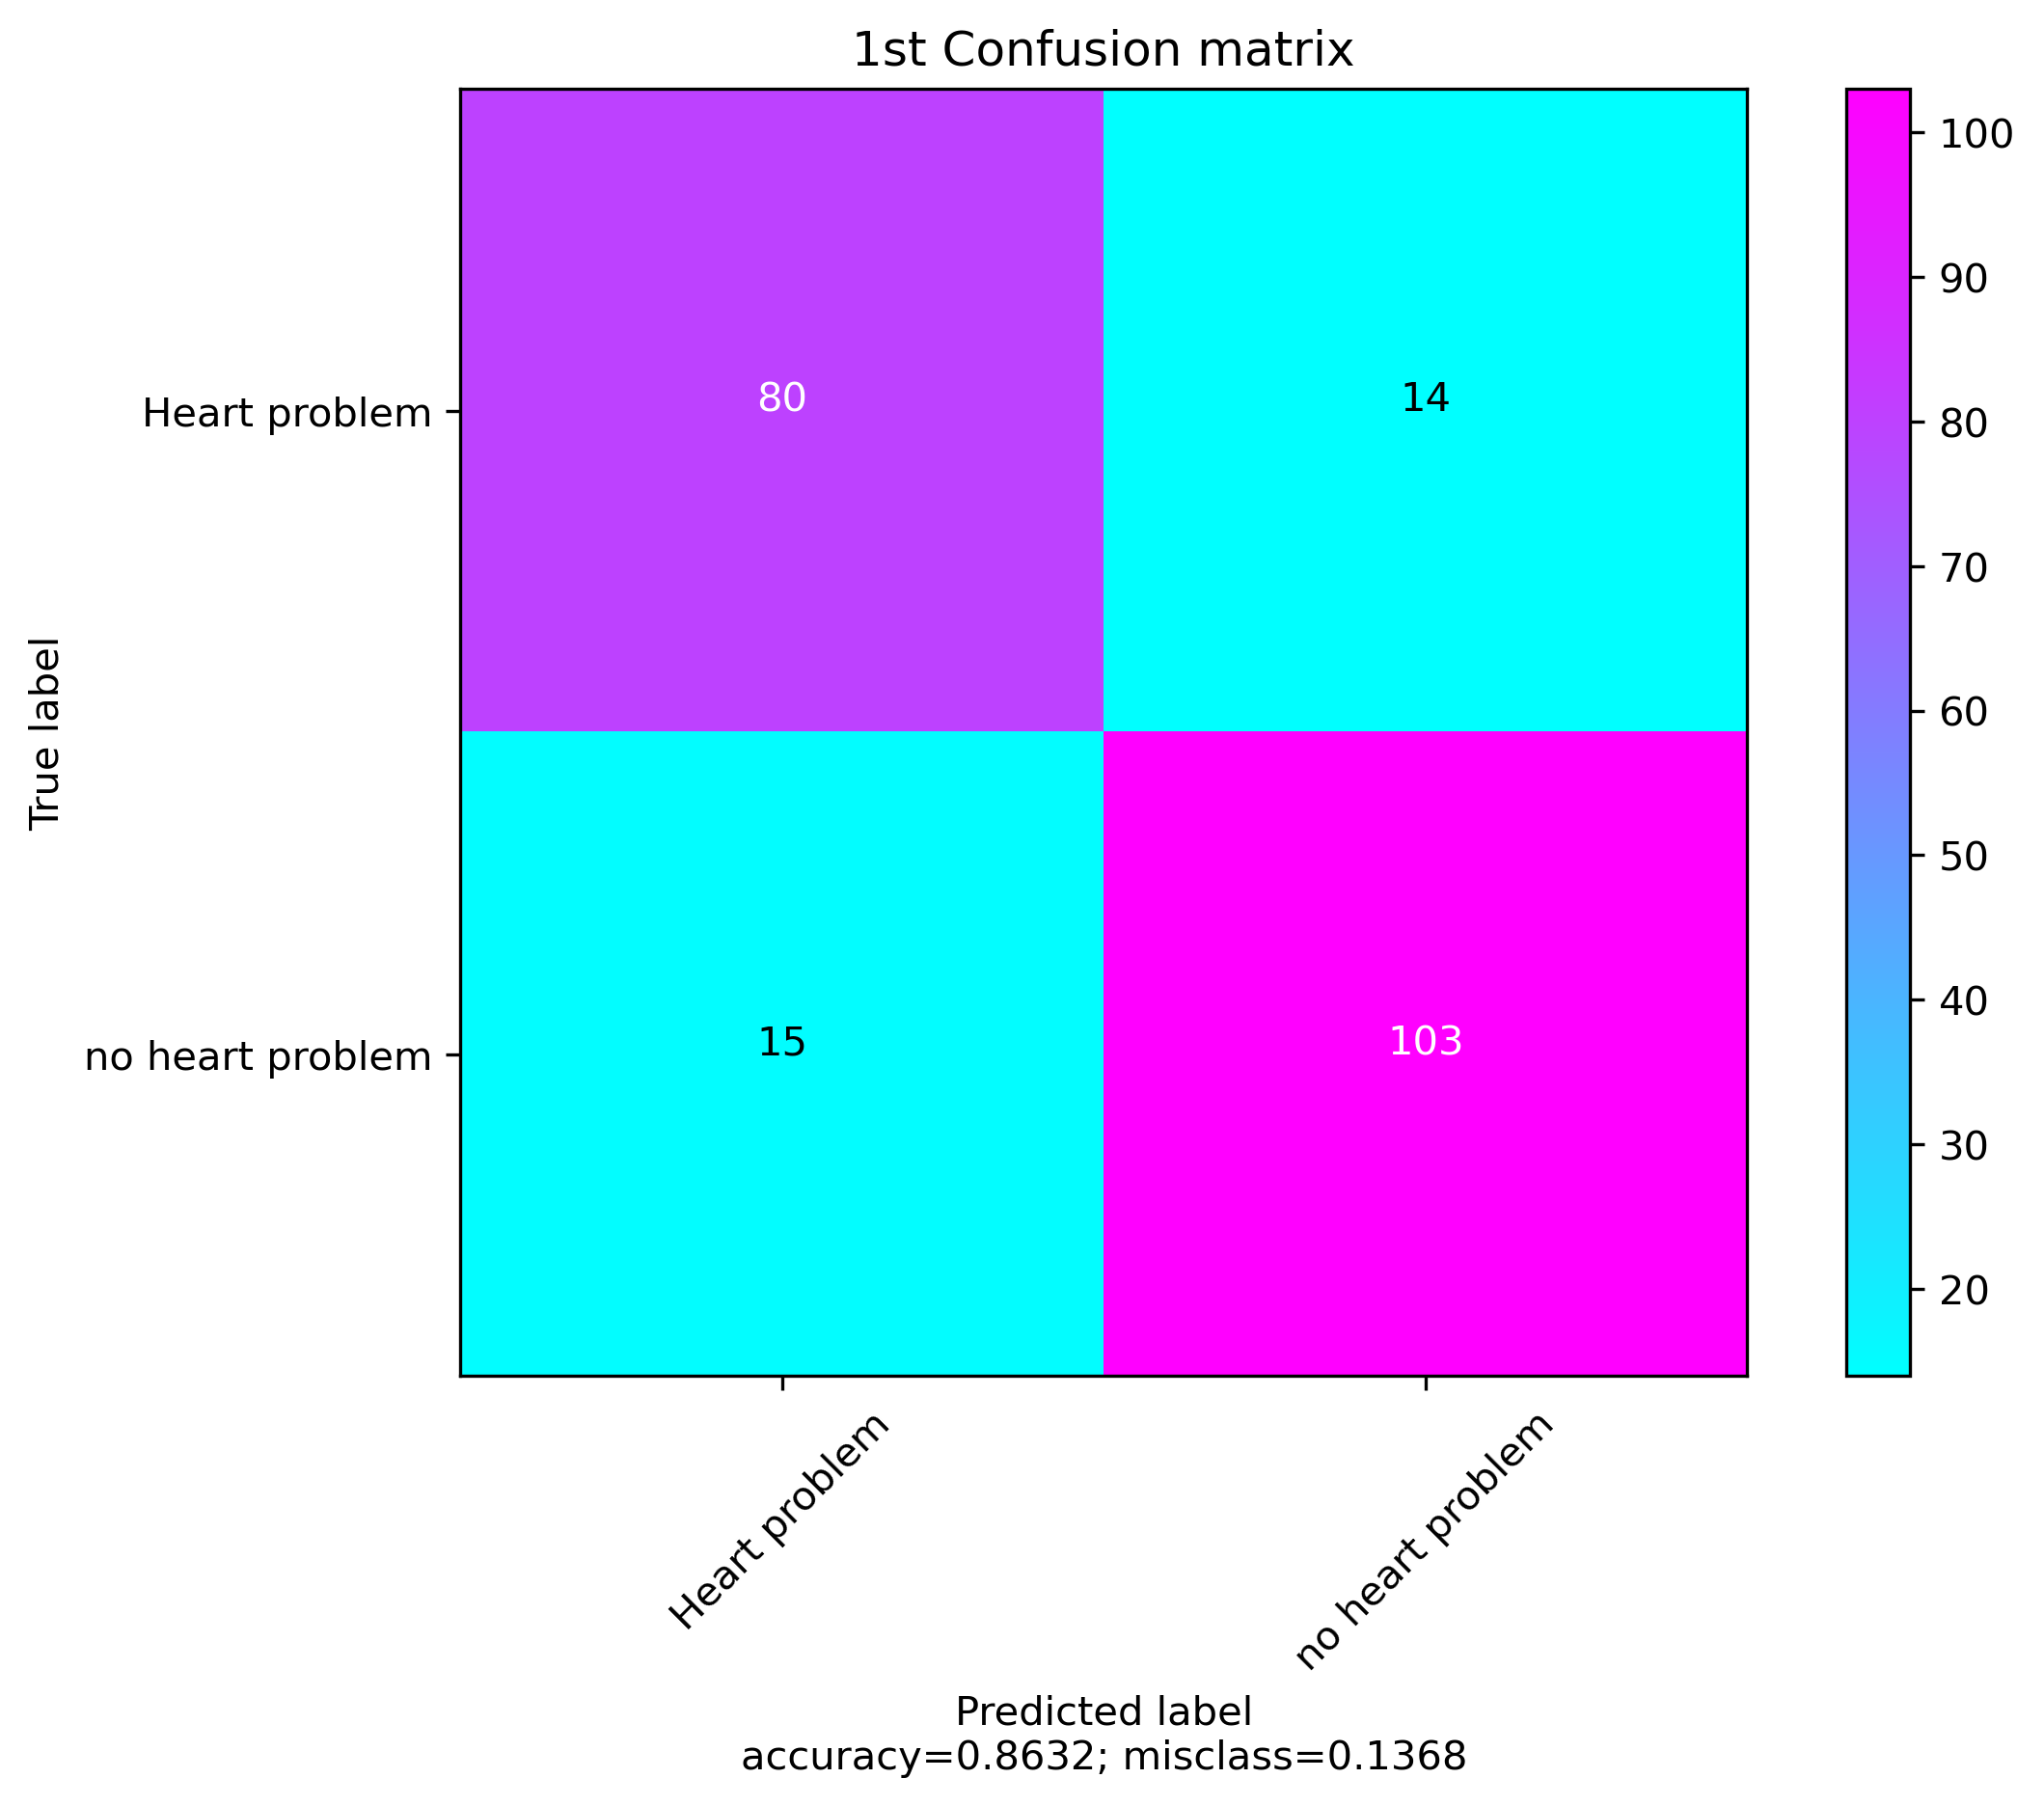

In [29]:
plot_confusion_matrix(mat,
                          ["Heart problem","no heart problem"], # use y_train.unique()  to know order of labels
                          title='1st Confusion matrix',
                          cmap=None,
                          normalize=False)